In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
df = pd.read_csv('../../data/processed_data/csv/dssp_data.csv')
df2 = pd.read_csv('../../data/processed_data/csv/netsurp2_data.csv')

In [123]:
df3 = df2.merge(df)

In [124]:
df3.head()

,id,thsa_netsurfp2,tasa_netsurfp2,q3_H,q3_E,q3_C,rhsa_netsurfp2,tasa,thsa,dssp_sequence,rhsa
0,16VPA,4463.595412,15771.844393,184.757265,21.729876,104.512860,0.283010,14530,4471,SRMPSPPMPVPPAALFNRLLDDLGFSAGPALCTMLDTWNEDLFSAL...,0.307708
1,1A0IA,4052.193801,16238.504164,93.365751,108.420693,130.213555,0.249542,16693,4497,VNIKTNPFKAVSFVESAIKKALDNAGYLIAEIKYDGVRGNICVDNT...,0.269394
2,1A1XA,2233.972635,7251.236206,4.477318,52.950487,48.572195,0.308082,6998,1934,AGEDVGAPPDHLWVHQEGIYRDEYQRTWVAVVEEETSFLRARVQQI...,0.276365
3,1A41A,2360.526070,12120.411371,128.720827,28.342119,63.937054,0.194756,11796,2781,NAKRDRIFVRVYNVMKRINCFINKNIKKSSTDSNYQLAVFMLMETM...,0.235758
4,1A5TA,4368.264084,16049.712850,187.619046,30.157108,105.223846,0.272171,15998,4143,MRWYPWLRPDFEKLVASYQAGRGHHALLIQALPGMGDDALIYALSR...,0.258970


In [89]:
def perc_corr(y_test, pred, x):
        error = abs(y_test-pred)
        y = [sum(error/y_test < i)/len(error) for i in x]
        return(y)

In [90]:
x = [x/100 for x in range(100+1)]
error = abs(df3['thsa']-df3['thsa_netsurfp2'])
y = [sum(error/df3['thsa'] < i)/len(error) for i in x]

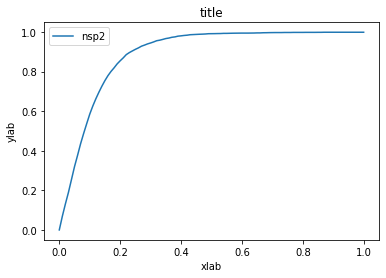

(array([0.13099667, 0.1235559 , 0.12218524, 0.11082827, 0.09731741,
        0.07754063, 0.06422557, 0.05345604, 0.03916193, 0.03563736,
        0.03113374, 0.01860192, 0.01546896, 0.0140983 , 0.01076953,
        0.01135696, 0.00665753, 0.00685334, 0.00587429, 0.00528686,
        0.00332876, 0.00313295, 0.00156648, 0.00137067, 0.00156648,
        0.00058743, 0.00097905, 0.00039162, 0.00058743, 0.00039162,
        0.        , 0.00039162, 0.00058743, 0.00097905, 0.00058743,
        0.00019581, 0.00039162, 0.        , 0.00039162, 0.        ,
        0.00019581, 0.        , 0.00019581, 0.00039162, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

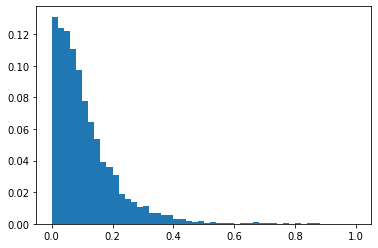

In [100]:
weights = np.ones_like(sorted(error/df3['thsa']))/float(len(sorted(error/df3['thsa'])))
plt

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9290992690>,
      dtype=object)

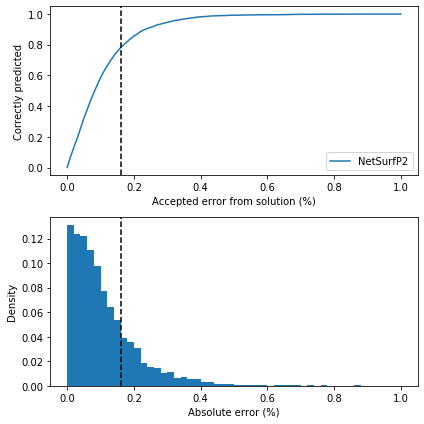

In [120]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

axes[0].plot(x,y, label='NetSurfP2')
axes[0].set_xlabel('Accepted error from solution (%)')
axes[0].set_ylabel('Correctly predicted')
axes[0].axvline(x=0.16, linestyle='--', color='black')
axes[0].legend()
axes[1].hist(sorted(error/df3['thsa']), weights=weights, bins=50, range=(0,1))
axes[1].set_xlabel('Absolute error (%)')
axes[1].set_ylabel('Density')
axes[1].axvline(x=0.16, linestyle='--', color='black')

figure.tight_layout()
axes